# GUI For Breast Cancer Classification Using Soft Margin SVM

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import streamlit as st
# import plotly.graph_objects as go
# import plotly.offline as pyoff
from matplotlib.colors import ListedColormap
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

st.write('<h1 style="text-align:center;color :white">Soft Margin SVM</h1>',
         unsafe_allow_html=True)
st.write('<h1 style="text-align:center;color :white">Team 06</h1>',
         unsafe_allow_html=True)


bcancer = load_breast_cancer()
df = pd.DataFrame(bcancer.data, columns=bcancer.feature_names)
df['target'] = bcancer.target
model = st.sidebar.radio('Choose Algorithm', ('Linear SVM', 'Non Linear SVM'))

if model == 'Linear SVM':

    X = df.drop(['target'], axis='columns')
    y = df.target

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=1234)

    sc_X = StandardScaler()
    X_train = sc_X.fit_transform(X_train)
    X_test = sc_X.fit_transform(X_test)

    features = ('mean radius', 'mean texture', 'mean perimeter',
                'mean area', 'mean smoothness', 'mean compactness')

    feature1 = st.sidebar.selectbox('Choose Feature 1', features)
    feature2 = st.sidebar.selectbox('Choose Feature 2', features, index=1)

    svc_model = SVC(kernel='linear', random_state=32)
    svc_model.fit(X_train, y_train)
    st.set_option('deprecation.showPyplotGlobalUse', False)
    plt.figure(figsize=(10, 8))
    sns.scatterplot(X_train[:, features.index(feature1)],
                    X_train[:, features.index(feature2)], hue=y_train)
    w = svc_model.coef_[0]           # w consists of 2 elements
    b = svc_model.intercept_[0]      # b consists of 1 element
    x_points = np.linspace(-3, 3)    # generating x-points from -1 to 1
    y_points = -(w[0] / w[1]) * x_points - b / \
        w[1]  # getting corresponding y-points
    y_points_below = (-(w[0] / w[1]) * x_points - b / w[1]) - 1
    y_points_above = (-(w[0] / w[1]) * x_points - b / w[1]) + 1
# Plotting a red hyperplane
    plt.plot(x_points, y_points, c='r', label=f'y ={w[0]}x1  + {w[1]}x2 {b}')
    plt.plot(x_points, y_points_above, 'b--',
             label=f"1 ={w[0]}x1  + {w[1]}x2  {b}")
    plt.plot(x_points, y_points_below, 'g--',
             label=f"-1 ={w[0]}x1  + {w[1]}x2  {b}")
    plt.xlabel(f'{feature1}')
    plt.ylabel(f'{feature2}')
    plt.title(f'{feature1} vs. {feature2}')
    plt.show()
    st.pyplot()
elif model == 'Non Linear SVM':
    features = ('mean radius', 'mean texture', 'mean perimeter',
                'mean area', 'mean smoothness', 'mean compactness')
    feature1 = st.sidebar.selectbox('Choose Feature 1', features)
    feature2 = st.sidebar.selectbox('Choose Feature 2', features, index=5)

    new_x = df.iloc[:, [features.index(
        feature1), features.index(feature2)]].values
    new_y = df.iloc[:, -1].values

    new_X_train, new_X_test, new_y_train, new_y_test = train_test_split(
        new_x, new_y, test_size=0.2, random_state=123)

    classifier1 = SVC(kernel='rbf')

    classifier1.fit(new_X_train, new_y_train)
    X_set, y_set = new_X_train, new_y_train

    # ploting the linear graph
    X1, X2 = np.meshgrid(np.arange(start=X_set[:, 0].min() - 1, stop=X_set[:, 0].max() + 1, step=0.01),
                         np.arange(start=X_set[:, 1].min() - 1, stop=X_set[:, 1].max() + 1, step=0.01))
    plt.contourf(X1, X2, classifier1.predict(
        np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape), alpha=0.75)
    plt.xlim(X1.min(), X1.max())
    plt.ylim(X2.min(), X2.max())

    # ploting scattered graph for the values
    for i, j in enumerate(np.unique(y_set)):
        plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                    c=ListedColormap(('red', 'blue'))(i), label=j)

    plt.xlabel(f'{feature1}')
    plt.ylabel(f'{feature2}')
    plt.title(f'{feature1} vs. {feature2}')
    plt.show()
    st.pyplot()


## Output

## Linear SVM Classifier

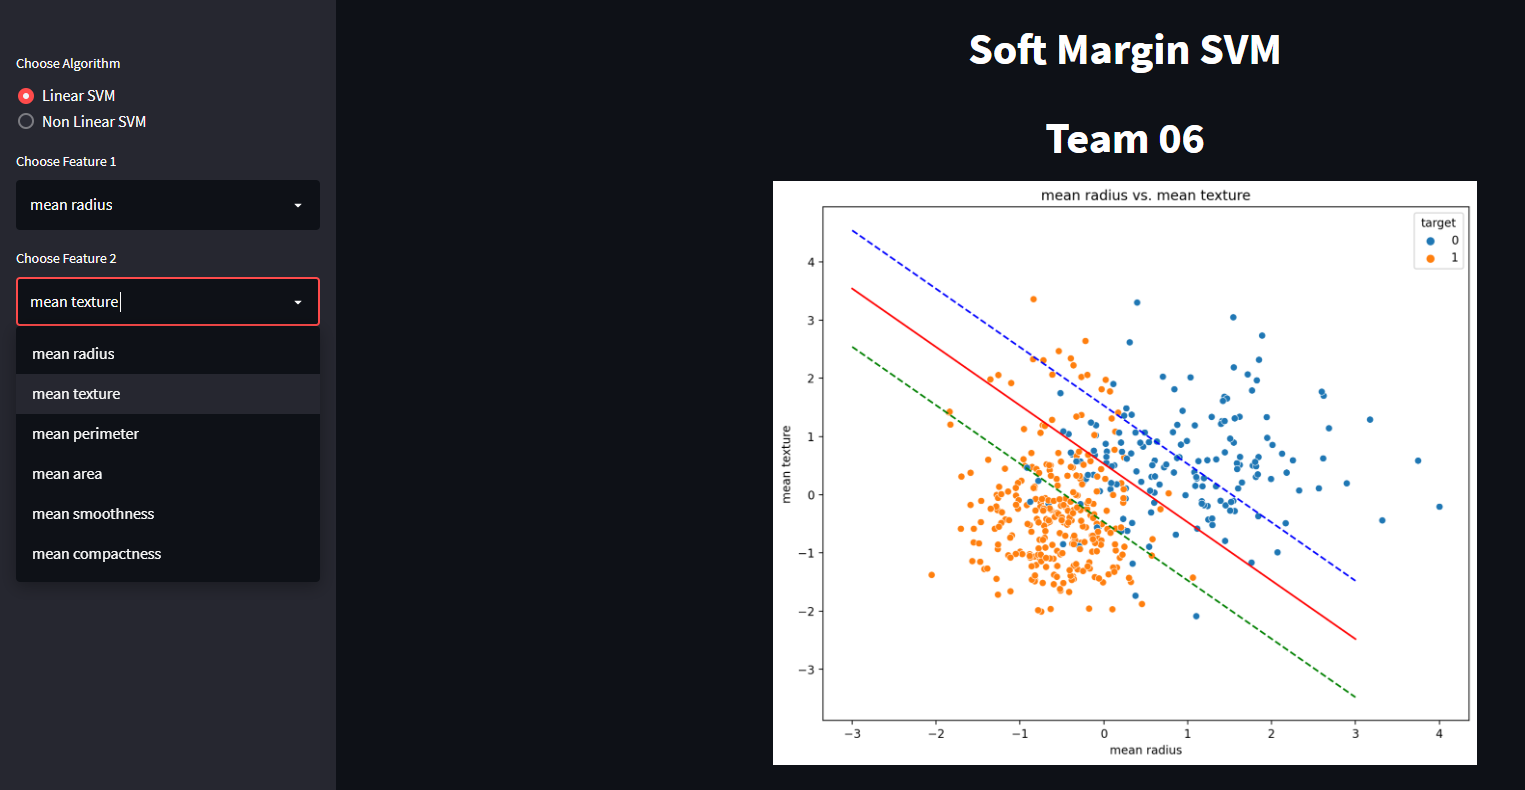

## Non-Linear SVM Classifier

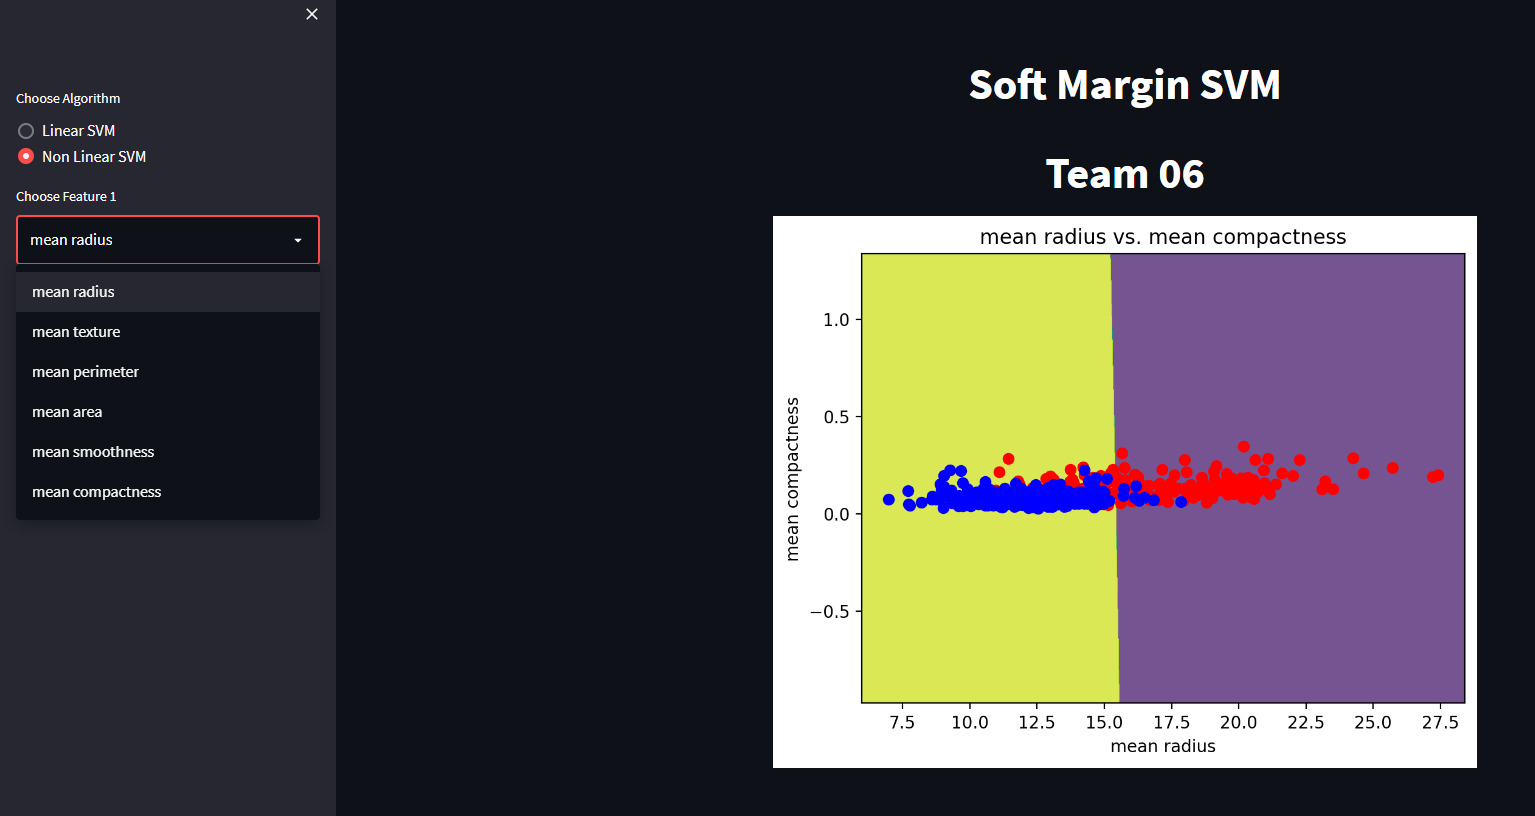

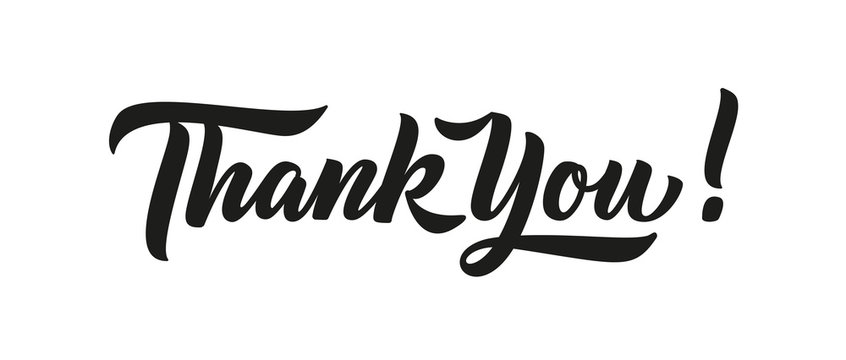